In [4]:
%matplotlib inline
from scipy import misc
from scipy.ndimage import gaussian_filter
from PIL import Image
import numpy as np
import cv2
import os


import matplotlib.pyplot as plt

In [18]:
l = os.listdir("../Database/images_800x600/test")

In [19]:
image = Image.open('../Database/images_800x600/test/{}'.format(l[1]))

In [20]:
image_arr = np.array(image)
image_arr.shape

(600, 800, 4)

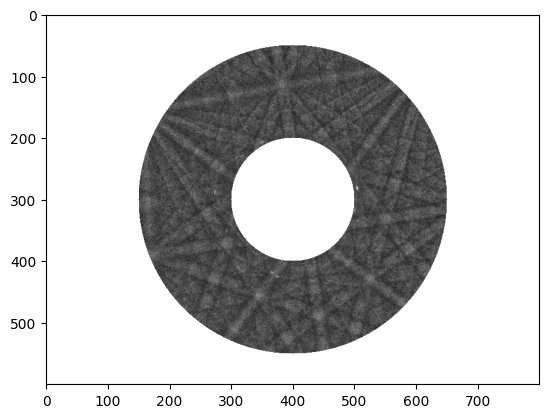

In [21]:
plt.imshow(image)

In [11]:

if image_arr.shape[-1] == 4:
    image_arr = image_arr[:,:,:-1]
    
image_arr = image_arr.astype(float)

image_arr /= 255

# Crop image Simulation Image
#image_arr = image_arr[100:300, 100:300]

# Convert array to image
#image = Image.fromarray(image_arr)
  
# Display image
#image.show()

image_arr.shape,image_arr.dtype

((600, 800, 3), dtype('float64'))

In [11]:
import kikuchipy as kp
s3 = image_arr.deepcopy()
s3.remove_dynamic_background(
    operation="subtract",  # Default
    filter_domain="frequency",  # Default
    std=8,  # Default is 1/8 of the pattern width
    truncate=4,  # Default
)

plot_pattern_processing(
    [s2.inav[0, 0].data, s3.inav[0, 0].data], ["Static", "Static + dynamic"]
)

AttributeError: 'numpy.ndarray' object has no attribute 'deepcopy'

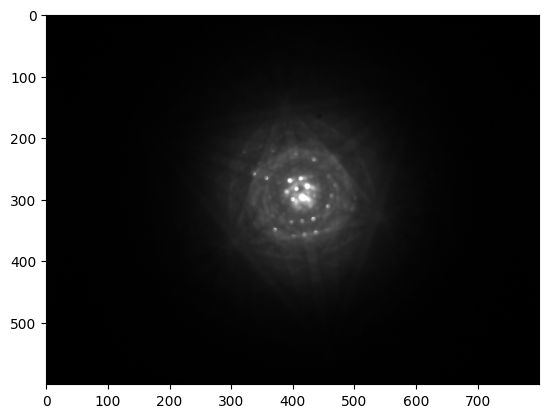

In [4]:
plt.imshow(image_arr, cmap = 'gray')

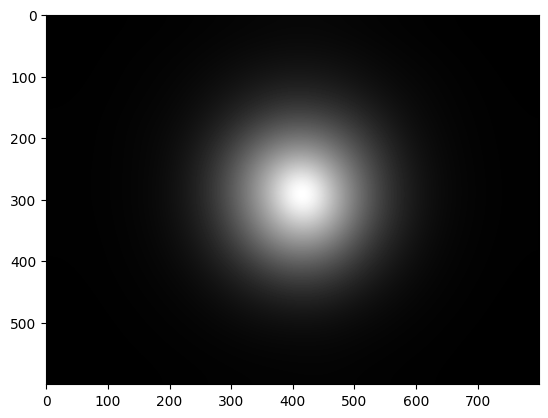

In [5]:
result = gaussian_filter(image_arr, sigma=30)
plt.imshow(result, cmap = 'gray')

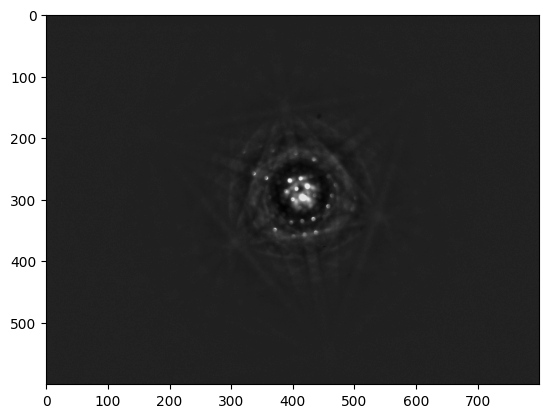

In [6]:
no_background = image_arr - result
plt.imshow(no_background, cmap = 'gray')

In [7]:
no_background *= 255

(array([[  0., 600.,   0., ...,   0.,   0.,   0.],
        [  0., 600.,   0., ...,   0.,   0.,   0.],
        [  0., 600.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0., 600.,   0., ...,   0.,   0.,   0.],
        [  0., 600.,   0., ...,   0.,   0.,   0.],
        [  0., 600.,   0., ...,   0.,   0.,   0.]]),
 array([-26.50447951,  -6.58996024,  13.32455903,  33.2390783 ,
         53.15359757,  73.06811684,  92.98263611, 112.89715539,
        132.81167466, 152.72619393, 172.6407132 ]),
 <a list of 800 BarContainer objects>)

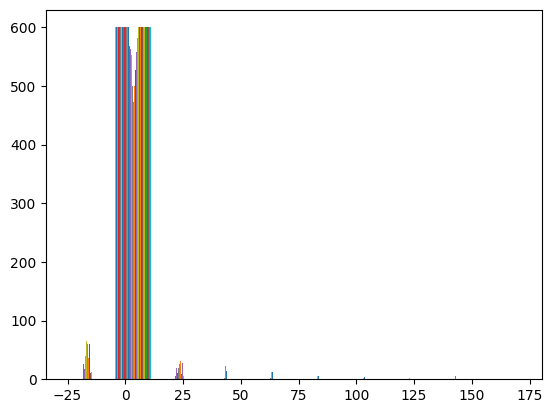

In [8]:
plt.hist(no_background)

threshhold = np.where(((img > -20) & (img < 20)), 255, 0)
plt.imshow(threshhold, cmap = 'gray')

threshhold = np.where(img < 20, img, 0)
plt.imshow(threshhold, cmap = 'gray')

(array([[  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.]]),
 array([-26.50447951, -23.85403156, -21.20358361, -18.55313566,
        -15.90268771, -13.25223976, -10.6017918 ,  -7.95134385,
         -5.3008959 ,  -2.65044795,   0.        ]),
 <a list of 800 BarContainer objects>)

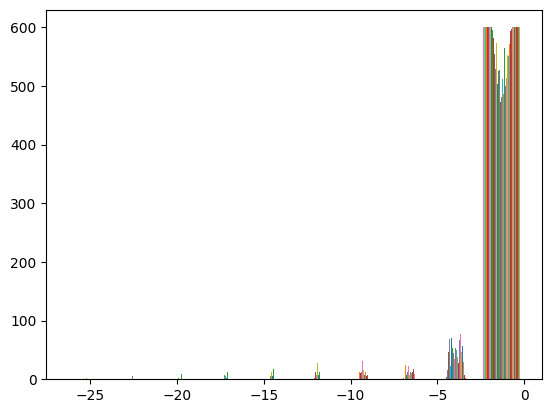

In [9]:
threshhold = np.where(no_background < -10 & (no_background > -20), no_background, 0)
plt.hist(threshhold)

threshhold2 = threshhold * 10
plt.imshow(threshhold2, cmap = 'gray')


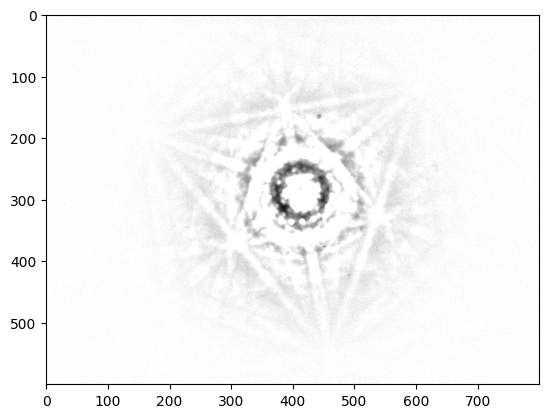

In [10]:
plt.imshow(threshhold, cmap = 'gray')